# Logistic Regression and Gradient Descent


### The origins of the *logistic* function

[Verhulst Paper](https://sci-hub.se/10.1007/978-3-642-81046-6_37)

Verhulst , a mathematician and a social scientist, was tackling an age old problem of estimating the population growth. Verhulst and ,his contemporary, Quetlet had interesting opinions about the limit to the extent a population can grow. 

He wanted to find the **Law of population**.

<center>

<img src="https://user-images.githubusercontent.com/6872080/106181015-11070600-616b-11eb-850a-2d5babb21df5.png" width="70%">

</center>

<center>

<img src="https://user-images.githubusercontent.com/6872080/106181250-5deadc80-616b-11eb-9850-8ae2b694f99a.png" width="70%">

</center>

The derivation the Verhulst gave in his original paper can be explored if of interest

# Derivation


<center>

<img src="https://user-images.githubusercontent.com/6872080/106182355-b40c4f80-616c-11eb-9d71-7d6057247bbe.png" width="60%">

</center>

The basic idea of Logistic Growth is simple and used till this day to model population growth and market penetration of new products and technologies. [JS CRAMER](https://papers.tinbergen.nl/02119.pdf)

# Visualizing Logistic Curve

The logistic function is give by

$$ \frac{1}{1 + e^{-z}} $$

Let's take a look at the logistic curve and how it behaves as we change z from -10 to +10

In [145]:
import numpy as np
import matplotlib.pyplot as plt

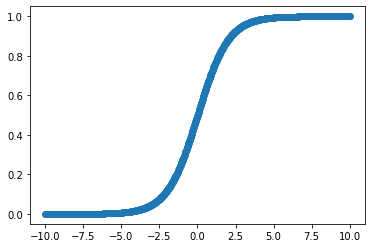

In [146]:
z = np.linspace(-10,10 , 1000)
def logistic(z):
  return 1/(1 + np.exp(-z))

vals = logistic(z)

plt.scatter(x=z , y= vals)

We can see that the curve quickly flattens beyond +4 , -4. Its overall variation comes from the region in between.

Another thing to note is that it's values are squished between 0 and 1 which is an important property that make this curve usefull for classification problems. Let's take a look at how [Dr Cox](https://en.wikipedia.org/wiki/David_Cox_(statistician)) used this curve.

# Cox and Binary Classification

[Original Paper by Cox](https://www.nuffield.ox.ac.uk/users/cox/cox48.pdf)

In this paper Cox proposes a way to deal with Binary Classification.

He says let there be a labelled dataset $D$ s.t $(x_i , y_i) \in D$ where $y_i \in {0,1}$ and $x_i$ can be either continous or categorical.

Now we want to find a mapping between the probability 
$$ \theta_i = p(y_i = 1) $$
and the $x_i$ values.

That is we want to learn a function $$ f(x) = P(y=1) $$

He goes on to say that since a linear relation is infeasible, because linear combination leads to $ -\inf < f(x) < +\inf$, but since $f(x)$ represents a probability there fore it has to be $ 0 \le f(x) \le 1$. Then he proposes - 

<center>
...in the absence of special considerations for a particular problem, the best form seems to be the logistic.

<img src="https://user-images.githubusercontent.com/6872080/106193088-094f5d80-617b-11eb-918c-96f9cf228b2d.png" width="70%"/>

 </center>


 Let's generate a classification dataset and see how this approach works.

In [213]:
class Dataset:

  def __init__(self, n = 50, how_far_away = 0.3):
    n2 = int(n/2)
    n75 = int(n*0.75)
    dist = 50

    # Use Random Normal Data
    self.xa = np.random.normal(100 , 2 , (n2,2))
    self.xb = np.random.normal(100 + dist*how_far_away , 2 , (n2,2))
    self.x = np.concatenate((self.xa ,self.xb))

    ## Create labels
    self.y = np.concatenate((np.ones(n2) , np.zeros(n2)))
    self.train_idx = np.random.choice(np.arange(0,n) ,n75)

    ## Create train/test partitions
    self.x_train = self.x[self.train_idx]
    self.x_test = self.x[~self.train_idx]
    self.y_train = self.y[self.train_idx]
    self.y_test = self.y[~self.train_idx]

In [216]:
dataset = Dataset(1000 , 0.1)

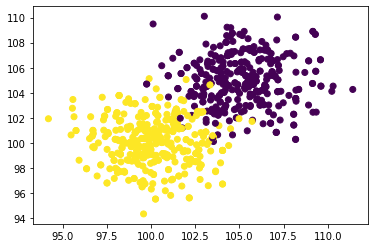

In [217]:
plt.scatter(x=dataset.x_train[:, 0] , y=dataset.x_train[:,1] , c=dataset.y_train)

Note that the dataset above is not linearly separable and `Perceptron` would have barfed all over this dataset trying to insanely find a hyperplane. 

Now we take a random set of $\beta_i$ and see how logit varies. (We subsume $\alpha_i$ into the $\beta$s by adding a constant feature to $x$)

In [241]:
X = np.hstack((dataset.x_train , np.ones((dataset.x_train .shape[0] , 1))))
X.shape

(750, 3)

In [242]:
bi = np.random.normal(0,5 , X.shape[1] )
bi

array([ 7.11662392, -1.99727224, -4.9310733 ])

In [243]:
def logit(bi , x):
  return np.dot(x , bi)

def p_y_equals_one(bi  , x):
  return 1/(1 + np.exp(-logit(bi,x)))

In [244]:
logit(bi , X).shape

(750,)

In [245]:
p_y_equals_one(bi,X)[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# How to find logistic regression parameters ?

We see that the probability predicted for all our datapoints is 1. Which is because we randomly picked some $\beta$ values. And hence we have a terrible classifier. We need to `learn` better $\beta$ values.

Method that is used to do that is `Maximum Likelihood Estimation` (MLE). If you need a refresher please check out [here](https://github.com/abhijeetdtu/ml-scratch/tree/master/notebooks)

For logistic regression we assumed that the probability that a data point has label = 1 is given by

$$ P(Y=1) = \frac{1}{1 + e^-\beta^Tx} = \sigma(B^Tx)$$

The labels that we are predicting are binary, and the output of our logistic regression function is supposed to be the probability that the label is one. This means that we can (and should) interpret each label as a Bernoulli random variable:

Therefore probability of each datapoint now becomes

$$ \sigma(B^Tx_i)^{y_i} (1-\sigma(B^Tx_i))^{1-y_i} $$


Now according to MLE, the likelihood of observing the entire dataset will be 

$$ Likelihood =  \prod_i \sigma(B^Tx_i)^{y_i} (1-\sigma(B^Tx_i))^{1-y_i} $$

Let's shorthand $ \sigma(B^Tx_i) $ to just $\sigma$

$$ Likelihood =  \prod_i \sigma^{y_i} (1-\sigma)^{1-y_i} $$


Now if we take log on both sides

$$ log(Likelihood) =  \sum_i log(\sigma^{y_i}) + log((1-\sigma)^{1-y_i}) $$

$$ log(Likelihood) =  \sum_i y_ilog(\sigma) + (1-y_i)log((1-\sigma)) $$


Now to find the maxima of the log-likelihood function, we proceed to differentiate

$$ \frac{\partial{LL}}{\partial{\beta}} =  \sum_i \frac{y_i}{\sigma} \frac{\partial{\sigma}}{\partial{\beta}} - \frac{(1-y_i)}{(1-\sigma)} \frac{\partial{\sigma}}{\partial{\beta}}$$

$$ \frac{\partial{LL}}{\partial{\beta}} =  \sum_i (\frac{y_i}{\sigma} - \frac{(1-y_i)}{(1-\sigma)} ) \frac{\partial{\sigma}}{\partial{\beta}}$$

$$ \frac{\partial{LL}}{\partial{\beta}} =  \sum_i \frac{y_i - \sigma}{\sigma(1-\sigma)} \frac{\partial{\sigma}}{\partial{\beta}}$$

Let's set $$ z = e^-\beta^Tx_i $$

then 
$$  \sigma = \frac{1}{1+z} $$
therefore $$ (1+z) = \frac{1}{\sigma} $$
or $$ z = \frac{1-\sigma}{\sigma} $$

$$ \frac{\partial{\sigma}}{\partial{\beta}} = -\frac{1}{(1+z)^2} \frac{\partial{z}}{\partial{\beta}}$$

substituting for (1+z) from above

$$ \frac{\partial{\sigma}}{\partial{\beta}} = -\sigma^2\frac{\partial{z}}{\partial{\beta}}$$

Now since 
$$ \frac{\partial{z}}{\partial{\beta}} = x_ie^-\beta^Tx_i $$

But keep in mind that $$ e^-\beta^Tx_i = z $$
therefore equation can be written as

$$ \frac{\partial{z}}{\partial{\beta}} = x_iz $$

Which makes
$$ \frac{\partial{\sigma}}{\partial{\beta}} = -\sigma^2 x_iz$$

but z itself is given by 
$$ z = \frac{1-\sigma}{\sigma} $$
therefore

$$ \frac{\partial{\sigma}}{\partial{\beta}} = -x_i\sigma^2 \frac{1-\sigma}{\sigma}$$

or 
$$ \frac{\partial{\sigma}}{\partial{\beta}} = -x_i\sigma(1-\sigma)$$

Now substituting back in 
$$ \frac{\partial{LL}}{\partial{\beta}} =  \sum_i \frac{y_i - \sigma}{\sigma(1-\sigma)} \frac{\partial{\sigma}}{\partial{\beta}}$$

We get

$$ \frac{\partial{LL}}{\partial{\beta}} =  \sum_i x_i(y_i - \sigma )$$

or 


$$ \frac{\partial{LL}}{\partial{\beta}} =  \sum_i x_i(y_i - \sigma(\beta^Tx_i) )$$
A rather simple equation for such a long derivation!

Now we want to find best values of $\beta$ , but there is no closed for solution to this equation and therefore we can't set it to zero to find the optimal $\beta$ values.

How to proceed then ?

In comes **Gradient Descent**



# Gradient Descent

To solve this equation **Cauchy** proposed in his [paper](https://cs.uwaterloo.ca/~y328yu/classics/cauchy-en.pdf) - 

Being given a system of simultaneous equations that the concern is to resolve, one begins ordinarily by reducing them to a single one, by aid of successive eliminations, save to resolve definitely, if it is able, the resulting equation. But it is important to observe, 

1. that, in a great number of cases, the elimination is not able to be effected in
any manner; 
2. that the resulting equation is generally very complicated, even though the given equations are rather simple.

For these two motives, one imagines that it would be very useful to understand a general method which may be able to serve to resolve directly a system of simultaneous equations.


### Mathematically

<center>

<img src="https://user-images.githubusercontent.com/6872080/106077941-84176a80-60e0-11eb-903e-261010baa673.png" width="90%"/>

<img src="https://user-images.githubusercontent.com/6872080/106077769-284ce180-60e0-11eb-8b92-108b01dc1acd.png" width="80%"/>

<img src="https://user-images.githubusercontent.com/6872080/106079346-0c970a80-60e3-11eb-94c5-79e1a40c259a.png" width="80%"/>

</center>

Therefore what we need is to make small changes to $\beta$ values in the direction of *steepest descent* which is given by the derivative of the $log(Likelihood)$ function , $ \frac{\partial{LL}}{\partial{\beta}}$. As we make these small changes to $\beta$ , the $log(likelihood) $ will be maximized and we will be able to find the values of $\beta$ that make it so.

$\theta$ above in today's terminology is the `learning rate`. It controls how big a step we are willing to take in the direction of the `gradient`

Let's code up our `Gradient Descent` class. Thing to note is that this class takes as input the function that calculates gradient of the log-likelihood function with respect to betas. This is the function we calculated above in our derivations.

In [248]:
class GradientDescent:
  def __init__(self ,derivative_fn,learning_rate = 1e-2):
    self.lr = learning_rate
    self.dll_dbeta = derivative_fn

  def fit(self , X , y , betas):
    
    while True:
      gradient = self.dll_dbeta(X , y , betas)
      betas -= self.lr*gradient
      if np.linalg.norm(gradient) < 1:
        break
    
    return betas

Now let's code up the `LogisticRegression` class. This class will use the `GradientDescent` class we just created to find the best $\beta$s. This encapsulates the `gradient\derivative` function as well.

While making predictions , the LR class calculates $P(y=1|x)$ and if its greater than 0.5 predicts label `1` else `0`.

## NOTE
An important thing to note is this line below 

`X = (X- X.mean()) / X.std()`

This is where we are standardizing our X variable. This is important to prevent **Exploding** and **Vanishing** gradients. Why this happens is because in our sigmoid funcion we have $e^{-z}$ and now if z becomes too large or too small then $e^{-z}$ becomes almost 0 (vanishes) or can become almost $+inf$ (explodes). To avoid this we push `X` into a manageable region of `[0,1]` by standardizing it.

In [260]:
class LogisticRegression:
  
  def sigmoid(self,z):
    return 1/(1+np.exp(-z))

  def derivative_function(self,X,y,betas):
    probability = self.sigmoid(np.dot(X , betas))
    residual = (probability-y).reshape(-1,1)
    return np.sum(np.multiply( X ,residual ) , 0)
    
  def fit(self, X , y):
    X = (X- X.mean()) / X.std()

    self.betas = np.random.normal(0,1,X.shape[1])
    gd = GradientDescent(self.derivative_function)
    gd.fit(X,y , self.betas)

  def predict(self,X):
    X = (X- X.mean()) / X.std()
    return np.round(self.sigmoid(np.dot(X, self.betas)) , 0)


Let's test the derivative function once to make sure it returns a (3,1) gradient , one for each feature ( including the constant feature) we have.

In [261]:
LogisticRegression().derivative_function(X,dataset.y_train,np.random.normal(0,1,3))

array([-38355.58424071, -38356.70427527,   -383.        ])

Alright! Let's get cracking and find the best parameters and then evaluate our model performance on the `Test Set`.

In [262]:
lr = LogisticRegression()

In [263]:
lr.fit(X,dataset.y_train)

In [264]:
from sklearn.metrics import accuracy_score

In [265]:
accuracy_score(dataset.y_train ,lr.predict(X))

0.9573333333333334

Awesome! We see that 95% of the examples in the training set have been correcly classfied. But what about the test set ?

In [266]:
x_test_stacked = np.hstack((dataset.x_test , np.ones((dataset.x_test.shape[0],1))))
accuracy_score(dataset.y_test ,lr.predict(x_test_stacked))

0.9466666666666667

We see that the test set performance, though lower (as expected), is pretty close to the training set!